In [1]:
# Install libraries first (ONLY if needed)
# !pip install pandas
# !pip install numpy
# !pip install plotly
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
# !pip install openpyxl

# Now import all libraries
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:

# Set your file path (use r"...")
file_path = r"C:\Users\sindh\Downloads\Capestone datasets\New_Datasets\FINAL_DATASET_CHARLOTTE.xlsx"

# Load the dataset
df = pd.read_excel(file_path)

# (Optional) Remove any extra spaces in column names
df.columns = df.columns.str.strip()

# Show the first 5 rows
print(df.head())

  IDENTITY          Unnamed: 1                     Unnamed: 2  Unnamed: 3  \
0      NaN      Type of Source                            NaN  Population   
1      NaN  Race and Ethnicity           White (Non-Hispanic)      343000   
2      NaN  Race and Ethnicity      Black or African American      299000   
3      NaN  Race and Ethnicity  Hispanic or Latino (Any race)      150000   
4      NaN  Race and Ethnicity           Asian (Non-Hispanic)       56282   

   Unnamed: 4 PIST SCORES Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  \
0  Percentage         NaN        NaN        NaN        NaN        NaN   
1       0.387         NaN        NaN        NaN        NaN        NaN   
2       33.7%         NaN        NaN        NaN        NaN        NaN   
3        0.17         NaN        NaN        NaN        NaN        NaN   
4       6.28%         NaN        NaN        NaN        NaN        NaN   

  Unnamed: 10 Unnamed: 11  Unnamed: 12 Unnamed: 13  
0         NaN         NaN          NaN       

In [5]:
# Clean up column names: remove spaces, multiple spaces, line breaks
df.columns = df.columns.str.replace('\n', ' ', regex=True)  # Replace newlines
df.columns = df.columns.str.strip()                        # Remove leading/trailing spaces
df.columns = df.columns.str.replace(' +', ' ', regex=True) # Replace multiple spaces with single space

In [7]:
print(df.columns.tolist())

['IDENTITY', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'PIST SCORES', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']


In [9]:
print(df.columns.tolist())

['IDENTITY', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'PIST SCORES', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']


C:\Users\sindh\AppData\Local\Temp\ipykernel_5216\2644366785.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subset['Unnamed: 2'], y=subset['Percentage'], palette="viridis")


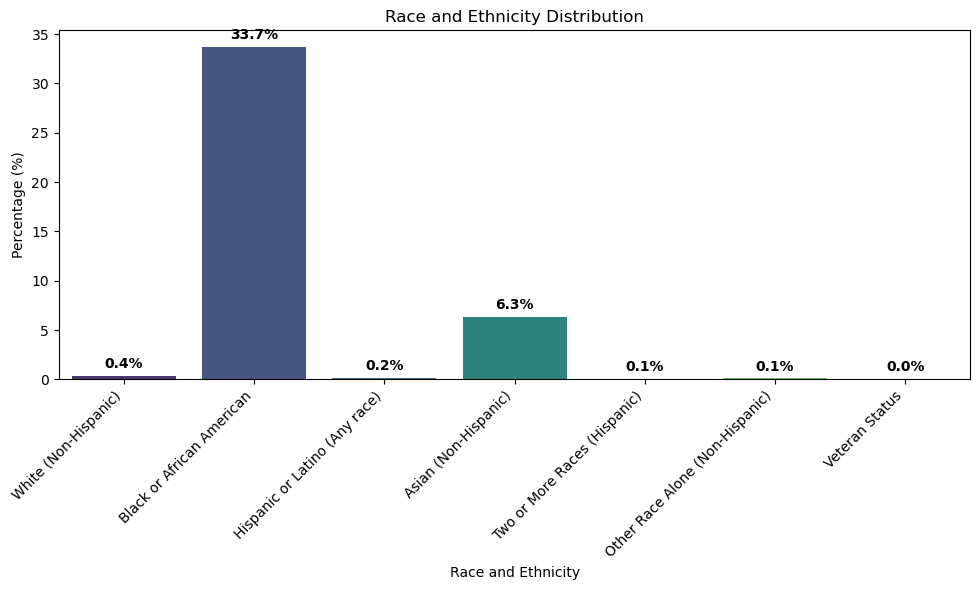

C:\Users\sindh\AppData\Local\Temp\ipykernel_5216\2644366785.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subset['Unnamed: 2'], y=subset['Percentage'], palette="viridis")
C:\Users\sindh\AppData\Local\Temp\ipykernel_5216\2644366785.py:35: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()
posx and posy should be finite values
posx and posy should be finite values


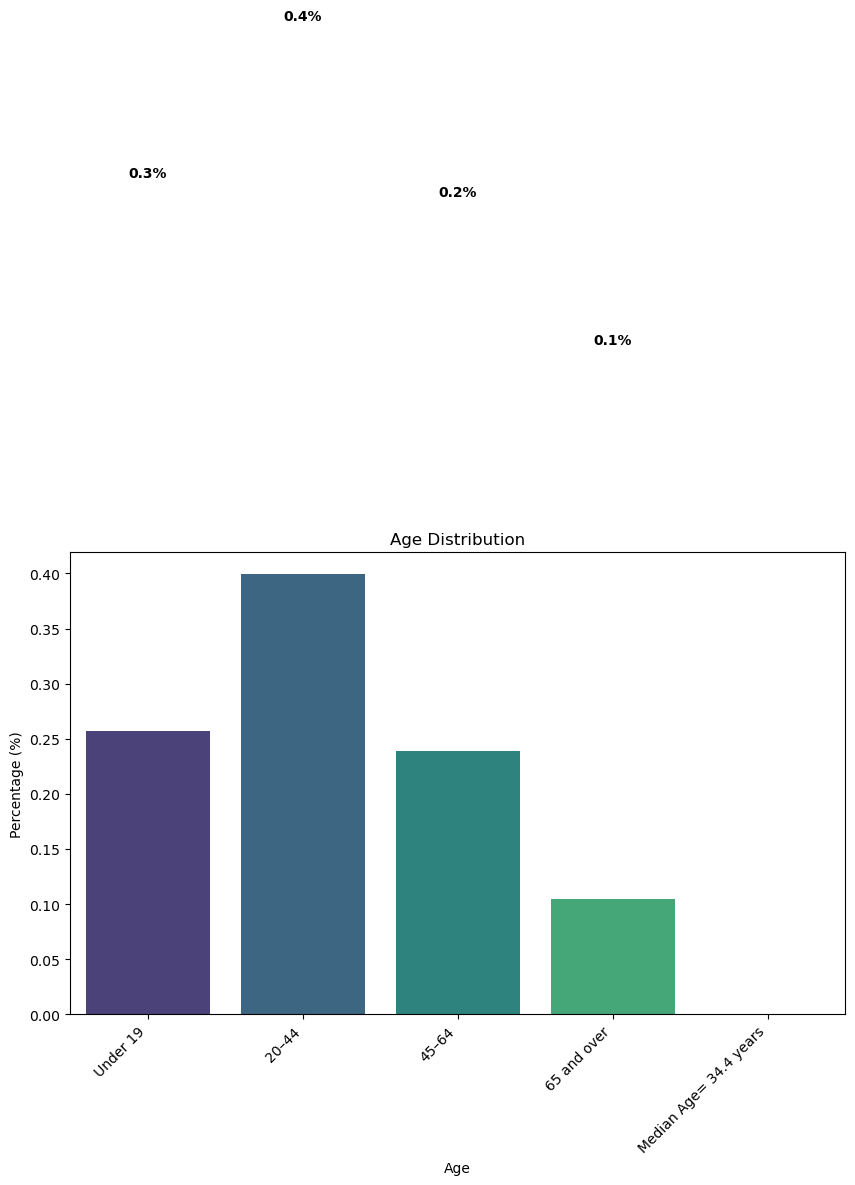

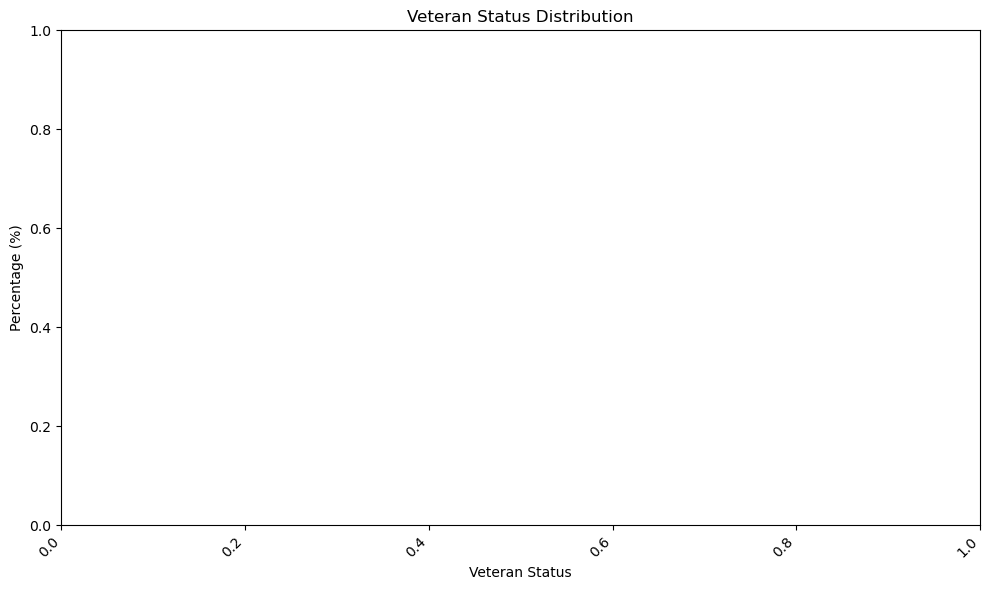

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file, starting from row 1 as header
file_path = r"C:\Users\sindh\Downloads\Capestone datasets\New_Datasets\FINAL_DATASET_CHARLOTTE.xlsx"
df = pd.read_excel(file_path, header=1)

# Clean column names
df.columns = df.columns.astype(str).str.strip().str.replace('\n', ' ', regex=True).str.replace(' +', ' ', regex=True)

# Define the demographic sections you want to plot
demographic_sections = ['Race and Ethnicity', 'Age', 'Veteran Status']

# Filter only the demographic rows
demo_df = df[df['Type of Source'].isin(demographic_sections)].copy()

# Clean 'Percentage' column (remove % sign and convert to float)
demo_df['Percentage'] = demo_df['Percentage'].replace('%', '', regex=True).astype(float)

# Plot each section
for section in demographic_sections:
    subset = demo_df[demo_df['Type of Source'] == section]
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=subset['Unnamed: 2'], y=subset['Percentage'], palette="viridis")
    plt.title(f'{section} Distribution')
    plt.xlabel(section)
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45, ha='right')
    
    # Add percentage labels on top of bars
    for i, value in enumerate(subset['Percentage']):
        ax.text(i, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

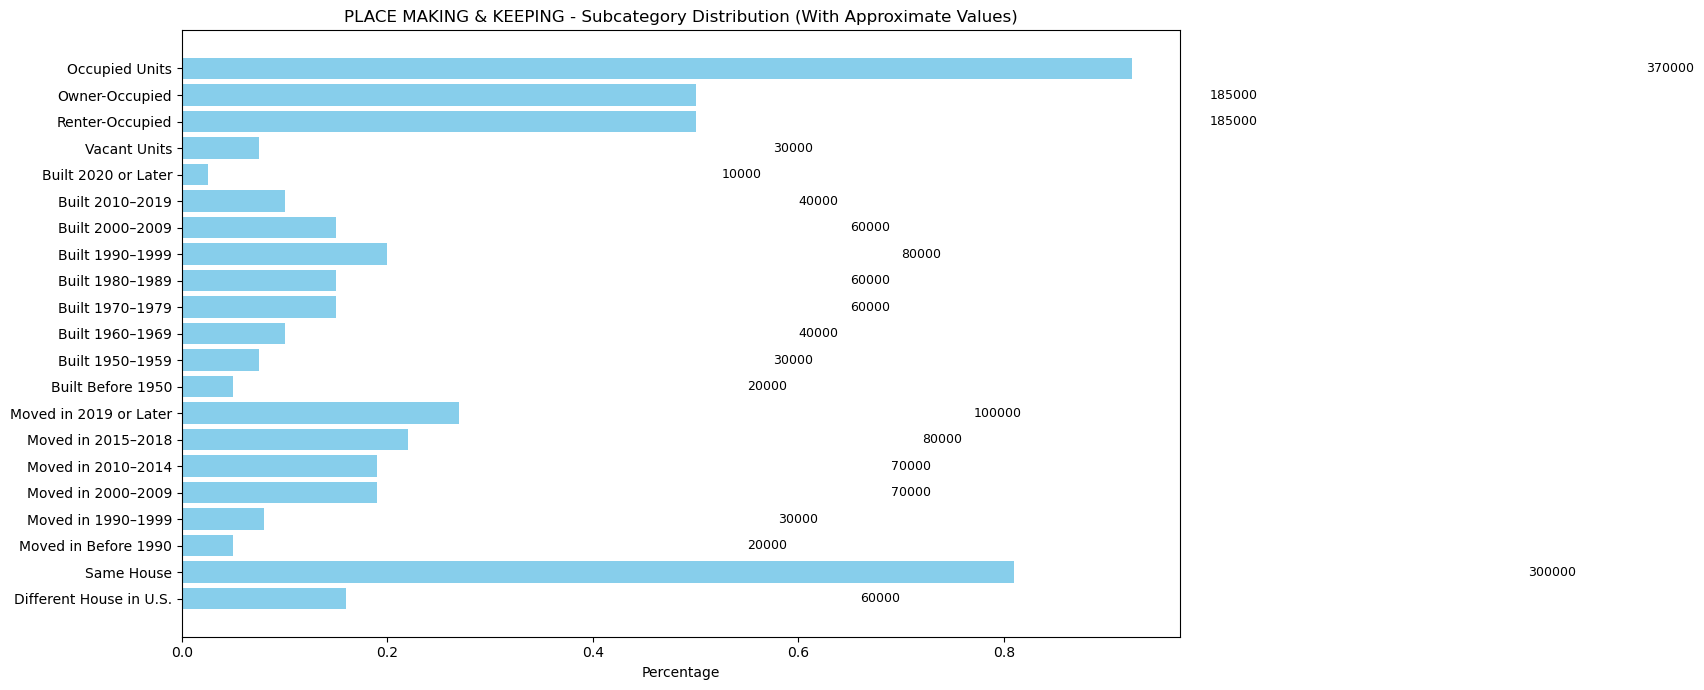

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Excel file and select the correct sheet
file_path = r"C:\Users\sindh\Downloads\Capestone datasets\New_Datasets\FINAL_DATASET_CHARLOTTE.xlsx"
excel_data = pd.ExcelFile(file_path)
df = excel_data.parse('Sheet1')

# Step 2: Find the starting index of the "PLACE MAKING & KEEPING" section
start_index = df[df.astype(str).apply(lambda row: row.str.contains("PLACE MAKING & KEEPING", case=False).any(), axis=1)].index[0]

# Step 3: Extract rows after the section heading
place_making_df = df.iloc[start_index + 1:].copy()

# Stop at the next fully empty row (end of this category)
end_index = place_making_df[place_making_df.isnull().all(axis=1)].index
if not end_index.empty:
    place_making_df = place_making_df.loc[:end_index[0] - 1]

# Step 4: Rename relevant columns
place_making_df.columns = ['IDENTITY', 'Category', 'Subcategory', 'Value', 'Percentage',
                           'PIST SCORES', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
                           'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13']

# Step 5: Select required columns and drop rows with missing data
clean_pm_df = place_making_df[['Subcategory', 'Value', 'Percentage']].dropna(subset=['Subcategory', 'Percentage'])

# Step 6: Clean and convert Percentage to numeric
clean_pm_df['Percentage'] = clean_pm_df['Percentage'].astype(str)
clean_pm_df['Percentage'] = clean_pm_df['Percentage'].str.replace('%', '', regex=False)
clean_pm_df['Percentage'] = clean_pm_df['Percentage'].str.replace(',', '', regex=False)
clean_pm_df['Percentage'] = pd.to_numeric(clean_pm_df['Percentage'], errors='coerce')
clean_pm_df = clean_pm_df.dropna(subset=['Percentage'])

# Step 7: Plotting the bar graph
plt.figure(figsize=(12, 7))
bars = plt.barh(clean_pm_df['Subcategory'], clean_pm_df['Percentage'], color='skyblue')
plt.xlabel('Percentage')
plt.title('PLACE MAKING & KEEPING - Subcategory Distribution (With Approximate Values)')
plt.tight_layout()
plt.gca().invert_yaxis()  # Highest value at the top

# Step 8: Add approximate value labels on each bar
for bar, val in zip(bars, clean_pm_df['Value']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, str(val), va='center', fontsize=9)


In [15]:

import folium
from geopy.geocoders import Nominatim

In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# File path
file_path = r"C:\Users\sindh\Downloads\Capestone datasets\New_Datasets\FINAL_DATASET_CHARLOTTE.xlsx"
xls = pd.ExcelFile(file_path)
parks_df = xls.parse("Sheet1", skiprows=46)

# STEP 2: Extract and rename relevant columns
parks_cleaned = parks_df.iloc[1:25, [1, 3, 4, 5, 6, 7]]
parks_cleaned.columns = ["Park Name", "ZIP Code", "Latitude", "Longitude", "Proximity", "Comment"]

# STEP 3: Assign PIST scores based on proximity
def assign_pist(proximity):
    if pd.isna(proximity):
        return None
    proximity = str(proximity).strip().lower()
    if "close" in proximity:
        return 3
    elif "moderate" in proximity:
        return 2
    elif "far" in proximity:
        return 1
    return None

parks_cleaned["PIST Score"] = parks_cleaned["Proximity"].apply(assign_pist)

# STEP 4: Create Folium map centered on Charlotte
charlotte_map = folium.Map(location=[35.2271, -80.8431], zoom_start=11)
proximity_colors = {"Close": "green", "Moderate": "orange", "Far": "red"}
marker_cluster = MarkerCluster().add_to(charlotte_map)

# STEP 5: Add markers for each park
for _, row in parks_cleaned.iterrows():
    try:
        lat = float(row["Latitude"])
        lon = float(row["Longitude"])
        proximity = str(row["Proximity"]).strip()
        color = proximity_colors.get(proximity, "blue")

        popup_html = f"""
        <div style="font-size: 14px; line-height: 1.5;">
            <b>🏞️ Park Name:</b> {row['Park Name']}<br>
            <b>📍 ZIP Code:</b> {row['ZIP Code']}<br>
            <b>🚶 Proximity:</b> <span style="color:{color};">{proximity}</span><br>
            <b>💬 Comment:</b> {row['Comment']}<br>
            <b>📊 PIST Score:</b> {row['PIST Score']}
        </div>
        """

        folium.Marker(
            location=[lat, lon],
            popup=folium.Popup(popup_html, max_width=300),
            icon=folium.Icon(color=color)
        ).add_to(marker_cluster)
    except Exception:
        continue

# STEP 6: Display the map in Jupyter
display(charlotte_map)


In [23]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# File path
file_path = r"C:\Users\sindh\Downloads\Capestone datasets\New_Datasets\FINAL_DATASET_CHARLOTTE.xlsx"
xls = pd.ExcelFile(file_path)
df_recreation = xls.parse("Sheet1", skiprows=74)

# Extract existing recreation center data
recreation_centers = df_recreation.iloc[1:11, [1, 2, 3, 4, 5, 6, 7]]
recreation_centers.columns = [
    "Name", "ZIP Code", "Latitude", "Longitude",
    "Rating", "Proximity", "Comment"
]

# Clean types
recreation_centers["Latitude"] = pd.to_numeric(recreation_centers["Latitude"], errors='coerce')
recreation_centers["Longitude"] = pd.to_numeric(recreation_centers["Longitude"], errors='coerce')
recreation_centers["ZIP Code"] = recreation_centers["ZIP Code"].astype(str).str[:5]
recreation_centers["Type"] = "Rec Center"

# Assign PIST scores based on rating
def score_from_rating(rating):
    rating = str(rating).strip().lower()
    if rating == "high":
        return 3
    elif rating == "low":
        return 1
    return None

recreation_centers["PIST Score"] = recreation_centers["Rating"].apply(score_from_rating)

# Proposed centers
proposed_centers = pd.DataFrame([
    {
        "Name": "Proposed Center - South Charlotte",
        "ZIP Code": "28210", "Latitude": 35.1309, "Longitude": -80.8612,
        "Rating": "Proposed", "Proximity": "High Need Area",
        "Comment": "Lacks recreational space for dense apartments", "PIST Score": 4
    },
    {
        "Name": "Proposed Center - North End",
        "ZIP Code": "28206", "Latitude": 35.2655, "Longitude": -80.8303,
        "Rating": "Proposed", "Proximity": "High Need Area",
        "Comment": "High youth population, no nearby facilities", "PIST Score": 4
    },
    {
        "Name": "Proposed Center - West Trade",
        "ZIP Code": "28208", "Latitude": 35.2449, "Longitude": -80.8867,
        "Rating": "Proposed", "Proximity": "High Need Area",
        "Comment": "Underserved by both parks and rec centers", "PIST Score": 4
    }
])
proposed_centers["Type"] = "Rec Center"

# Combine
all_rec_centers = pd.concat([recreation_centers, proposed_centers], ignore_index=True)

# Create Folium map
charlotte_map = folium.Map(location=[35.2271, -80.8431], zoom_start=11)
cluster = MarkerCluster().add_to(charlotte_map)

# Color logic
def rec_color(row):
    rating = str(row["Rating"]).lower()
    if rating == "high":
        return "green"
    elif rating == "low":
        return "red"
    elif row["PIST Score"] == 4:
        return "blue"
    else:
        return "gray"

# Add markers
for _, row in all_rec_centers.iterrows():
    try:
        color = rec_color(row)
        popup = f"""
        <div style="font-size: 14px;">
            <b>🏛️ Rec Center:</b> {row['Name']}<br>
            <b>📍 ZIP:</b> {row['ZIP Code']}<br>
            <b>🚦 Rating:</b> {row['Rating']}<br>
            <b>🚶 Proximity:</b> {row['Proximity']}<br>
            <b>💬 Comment:</b> {row['Comment']}<br>
            <b>📊 PIST Score:</b> {row['PIST Score']}
        </div>
        """
        folium.Marker(
            location=[row["Latitude"], row["Longitude"]],
            popup=folium.Popup(popup, max_width=300),
            icon=folium.Icon(color=color)
        ).add_to(cluster)
    except:
        continue
# ✅ Show the map
display(charlotte_map)

# ✅ Export the combined recreation centers data
all_rec_centers.to_csv("recreation_centers_all.csv", index=False)
all_rec_centers.to_excel("recreation_centers_all.xlsx", index=False)

print("✅ Map ready. Data exported as 'recreation_centers_all.csv' and 'recreation_centers_all.xlsx'")


✅ Map ready. Data exported as 'recreation_centers_all.csv' and 'recreation_centers_all.xlsx'


In [27]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Load previous transportation data (replace with your file if needed)
transportation_data = pd.read_csv("transportation_centers_charlotte.csv")

# Define 5 proposed bus stops
proposed_bus_stops = pd.DataFrame([
    {
        "Name": "Proposed Bus Stop - Eastway Drive",
        "ZIP Code": "28205",
        "Latitude": 35.2302,
        "Longitude": -80.7675,
        "Proximity": "High Need Area",
        "Comment": "Area has limited transit and rising residential growth",
        "PIST Score": 4
    },
    {
        "Name": "Proposed Bus Stop - Tuckaseegee Rd",
        "ZIP Code": "28208",
        "Latitude": 35.2517,
        "Longitude": -80.8944,
        "Proximity": "High Need Area",
        "Comment": "High density, underserved by current routes",
        "PIST Score": 4
    },
    {
        "Name": "Proposed Bus Stop - Sharon Amity",
        "ZIP Code": "28212",
        "Latitude": 35.1943,
        "Longitude": -80.7521,
        "Proximity": "High Need Area",
        "Comment": "Growing community without nearby stops",
        "PIST Score": 4
    },
    {
        "Name": "Proposed Bus Stop - Clanton Rd",
        "ZIP Code": "28217",
        "Latitude": 35.1886,
        "Longitude": -80.8924,
        "Proximity": "High Need Area",
        "Comment": "Industrial area with few connections to housing",
        "PIST Score": 4
    },
    {
        "Name": "Proposed Bus Stop - Graham St",
        "ZIP Code": "28206",
        "Latitude": 35.2563,
        "Longitude": -80.8257,
        "Proximity": "High Need Area",
        "Comment": "Large working population, low transit access",
        "PIST Score": 4
    }
])

# Combine with existing data
full_transport = pd.concat([transportation_data, proposed_bus_stops], ignore_index=True)

# Map setup
transport_map = folium.Map(location=[35.2271, -80.8431], zoom_start=11)
cluster = MarkerCluster().add_to(transport_map)

# Color logic
def get_color(score):
    if score == 4:
        return "blue"
    elif score == 3:
        return "green"
    elif score == 2:
        return "orange"
    elif score == 1:
        return "red"
    return "gray"

# Add markers
for _, row in full_transport.iterrows():
    popup = f"""
    <div style="font-size: 14px;">
        <b>🚏 Name:</b> {row['Name']}<br>
        <b>📍 ZIP:</b> {row['ZIP Code']}<br>
        <b>🚶 Proximity:</b> {row['Proximity']}<br>
        <b>💬 Comment:</b> {row['Comment']}<br>
        <b>📊 PIST Score:</b> {row['PIST Score']}
    </div>
    """
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=folium.Popup(popup, max_width=300),
        icon=folium.Icon(color=get_color(row["PIST Score"]))
    ).add_to(cluster)

# Display map
display(transport_map)

# Export updated dataset
full_transport.to_csv("transportation_centers_with_proposed.csv", index=False)
full_transport.to_excel("transportation_centers_with_proposed.xlsx", index=False)

print("✅ Map updated with proposed bus stops. Files saved.")


✅ Map updated with proposed bus stops. Files saved.


In [31]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# -----------------------------
# 1. EXISTING SCHOOLS DATA
# -----------------------------
schools_data = pd.DataFrame([
    {"Institution Name": "Johnson & Wales University", "ZIP Code": "28202", "Rating": "B+", "Latitude": 35.2327, "Longitude": -80.8544},
    {"Institution Name": "Johnson C. Smith University", "ZIP Code": "28216", "Rating": "C+", "Latitude": 35.2420, "Longitude": -80.8457},
    {"Institution Name": "Charlotte Lab School", "ZIP Code": "28202", "Rating": "B", "Latitude": 35.2296, "Longitude": -80.8368},
    {"Institution Name": "Dilworth Elementary School: Latta Campus", "ZIP Code": "28203", "Rating": "A-", "Latitude": 35.2099, "Longitude": -80.8515},
    {"Institution Name": "Highland Renaissance Academy", "ZIP Code": "28206", "Rating": "C", "Latitude": 35.2625, "Longitude": -80.8096},
    {"Institution Name": "Villa Heights Elementary School", "ZIP Code": "28205", "Rating": "C", "Latitude": 35.2434, "Longitude": -80.7962},
    {"Institution Name": "University of North Carolina at Charlotte", "ZIP Code": "28223", "Rating": "B+", "Latitude": 35.3076, "Longitude": -80.7336},
    {"Institution Name": "Mallard Creek High School", "ZIP Code": "28269", "Rating": "B+", "Latitude": 35.3620, "Longitude": -80.7526},
    {"Institution Name": "Garinger High School", "ZIP Code": "28205", "Rating": "C", "Latitude": 35.2280, "Longitude": -80.7905},
    {"Institution Name": "East Mecklenburg High School", "ZIP Code": "28212", "Rating": "B", "Latitude": 35.1715, "Longitude": -80.7605},
    {"Institution Name": "West Charlotte High School", "ZIP Code": "28216", "Rating": "C+", "Latitude": 35.2757, "Longitude": -80.8730},
    {"Institution Name": "Phillip O. Berry Academy of Technology", "ZIP Code": "28208", "Rating": "B", "Latitude": 35.2402, "Longitude": -80.8792},
    {"Institution Name": "Ardrey Kell High School", "ZIP Code": "28277", "Rating": "A", "Latitude": 35.0247, "Longitude": -80.8425},
    {"Institution Name": "Providence High School", "ZIP Code": "28270", "Rating": "A", "Latitude": 35.1060, "Longitude": -80.7614},
    {"Institution Name": "Charlotte Latin School", "ZIP Code": "28277", "Rating": "A+", "Latitude": 35.0956, "Longitude": -80.7738},
    {"Institution Name": "William Amos Hough High School", "ZIP Code": "28031", "Rating": "A-", "Latitude": 35.4568, "Longitude": -80.8250}
])
schools_data["Type"] = "School"
schools_data["High School Grad %"] = 90.0
schools_data["PIST Score"] = 3
schools_data["Comment"] = "Integrated from FINAL_DATASET_CHARLOTTE"
schools_data["Proximity"] = "Moderate"
schools_data = schools_data.rename(columns={"Institution Name": "Name"})

# -----------------------------
# 2. PROPOSED SCHOOLS & LIBRARIES
# -----------------------------
edu_lib_data = pd.DataFrame([
    {"Type": "Education", "Name": "Proposed School - Eastland Area", "ZIP Code": "28212", "Latitude": 35.1938, "Longitude": -80.7511, "Proximity": "High Need Area", "Comment": "High youth population, long commute to schools", "PIST Score": 4},
    {"Type": "Education", "Name": "Proposed School - West Blvd", "ZIP Code": "28208", "Latitude": 35.2335, "Longitude": -80.8998, "Proximity": "High Need Area", "Comment": "Lack of nearby high schools", "PIST Score": 4},
    {"Type": "Education", "Name": "Proposed School - Sugar Creek", "ZIP Code": "28269", "Latitude": 35.3355, "Longitude": -80.8001, "Proximity": "High Need Area", "Comment": "Rising student population", "PIST Score": 4},
    {"Type": "Education", "Name": "Proposed School - North Tryon", "ZIP Code": "28213", "Latitude": 35.3034, "Longitude": -80.7510, "Proximity": "High Need Area", "Comment": "Fast growing family community", "PIST Score": 4},
    {"Type": "Education", "Name": "Proposed School - Nations Ford", "ZIP Code": "28217", "Latitude": 35.1738, "Longitude": -80.9104, "Proximity": "High Need Area", "Comment": "Underserved by public schools", "PIST Score": 4},
    {"Type": "Library", "Name": "Proposed Library - Grier Heights", "ZIP Code": "28205", "Latitude": 35.1998, "Longitude": -80.7920, "Proximity": "High Need Area", "Comment": "Dense neighborhood lacks public library", "PIST Score": 4},
    {"Type": "Library", "Name": "Proposed Library - Hidden Valley", "ZIP Code": "28213", "Latitude": 35.2691, "Longitude": -80.7801, "Proximity": "High Need Area", "Comment": "Youth-dominant region with limited access", "PIST Score": 4},
    {"Type": "Library", "Name": "Proposed Library - Steele Creek", "ZIP Code": "28273", "Latitude": 35.1369, "Longitude": -80.9991, "Proximity": "High Need Area", "Comment": "No major library nearby for growing area", "PIST Score": 4},
    {"Type": "Library", "Name": "Proposed Library - Eastway Dr", "ZIP Code": "28205", "Latitude": 35.2300, "Longitude": -80.7712, "Proximity": "High Need Area", "Comment": "Underserved by digital and reading spaces", "PIST Score": 4},
    {"Type": "Library", "Name": "Proposed Library - South Blvd", "ZIP Code": "28217", "Latitude": 35.1790, "Longitude": -80.8842, "Proximity": "High Need Area", "Comment": "No public reading access in walking distance", "PIST Score": 4}
])

# -----------------------------
# 3. COMBINE AND MAP
# -----------------------------
combined_df = pd.concat([schools_data, edu_lib_data], ignore_index=True)

def rating_color(rating):
    if pd.isna(rating): return "blue"  # Proposed = blue
    rating = rating.strip().upper()
    return {
        "A+": "blue", "A": "darkgreen", "A-": "green",
        "B+": "lightgreen", "B": "orange",
        "C+": "red", "C": "darkred"
    }.get(rating, "gray")

# Initialize map
edu_map = folium.Map(location=[35.2271, -80.8431], zoom_start=11)
cluster = MarkerCluster().add_to(edu_map)

# Add markers
for _, row in combined_df.iterrows():
    popup = f"""
    <div style="font-size: 14px;">
        <b>🏫 Type:</b> {row['Type']}<br>
        <b>📍 Name:</b> {row['Name']}<br>
        <b>📬 ZIP:</b> {row['ZIP Code']}<br>
        <b>⭐ Rating:</b> {row.get('Rating', 'N/A')}<br>
        <b>🎓 Grad %:</b> {row.get('High School Grad %', 'N/A')}<br>
        <b>🚶 Proximity:</b> {row['Proximity']}<br>
        <b>💬 Comment:</b> {row['Comment']}<br>
        <b>📊 PIST Score:</b> {row['PIST Score']}
    </div>
    """
    color = rating_color(row.get("Rating", None)) if row["Type"] == "School" else "blue"
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=folium.Popup(popup, max_width=300),
        icon=folium.Icon(color=color, icon="info-sign")
    ).add_to(cluster)

# Show and export
display(edu_map)
combined_df.to_csv("charlotte_schools_libraries_combined.csv", index=False)
combined_df.to_excel("charlotte_schools_libraries_combined.xlsx", index=False)

print("✅ Combined map created and files exported.")


✅ Combined map created and files exported.


In [43]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# 22 Resiliency locations from your dataset
resiliency_data = [
    {"ZIP Code": "28202", "Area": "Uptown", "Heat Risk": "Extreme", "Drought Risk": "High", "Flood Risk": "Moderate", "Wildfire Risk": "Low", "Storm Risk": "Moderate", "Latitude": 35.2271, "Longitude": -80.8431},
    {"ZIP Code": "28203", "Area": "South End", "Heat Risk": "Extreme", "Drought Risk": "High", "Flood Risk": "Moderate", "Wildfire Risk": "Low", "Storm Risk": "Moderate", "Latitude": 35.2154, "Longitude": -80.8601},
    {"ZIP Code": "28205", "Area": "NoDa/Plaza Midwood", "Heat Risk": "High", "Drought Risk": "High", "Flood Risk": "High", "Wildfire Risk": "Low", "Storm Risk": "Moderate", "Latitude": 35.2204, "Longitude": -80.7736},
    {"ZIP Code": "28206", "Area": "North Charlotte", "Heat Risk": "High", "Drought Risk": "High", "Flood Risk": "High", "Wildfire Risk": "Low", "Storm Risk": "Moderate", "Latitude": 35.2571, "Longitude": -80.819},
    {"ZIP Code": "28207", "Area": "Myers Park", "Heat Risk": "High", "Drought Risk": "Moderate", "Flood Risk": "Low", "Wildfire Risk": "Low", "Storm Risk": "Low", "Latitude": 35.2001, "Longitude": -80.827},
    {"ZIP Code": "28208", "Area": "West Charlotte", "Heat Risk": "Very High", "Drought Risk": "High", "Flood Risk": "High", "Wildfire Risk": "Low", "Storm Risk": "High", "Latitude": 35.2407, "Longitude": -80.8896},
    {"ZIP Code": "28209", "Area": "Dilworth", "Heat Risk": "High", "Drought Risk": "Moderate", "Flood Risk": "Moderate", "Wildfire Risk": "Low", "Storm Risk": "Moderate", "Latitude": 35.1775, "Longitude": -80.8497},
    {"ZIP Code": "28210", "Area": "SouthPark", "Heat Risk": "High", "Drought Risk": "Moderate", "Flood Risk": "Low", "Wildfire Risk": "Low", "Storm Risk": "Low", "Latitude": 35.1385, "Longitude": -80.856},
    {"ZIP Code": "28211", "Area": "Cotswold", "Heat Risk": "High", "Drought Risk": "Moderate", "Flood Risk": "Moderate", "Wildfire Risk": "Low", "Storm Risk": "Moderate", "Latitude": 35.1659, "Longitude": -80.798},
    {"ZIP Code": "28212", "Area": "East Charlotte", "Heat Risk": "High", "Drought Risk": "High", "Flood Risk": "High", "Wildfire Risk": "Low", "Storm Risk": "High", "Latitude": 35.1891, "Longitude": -80.7434},
    {"ZIP Code": "28213", "Area": "University City", "Heat Risk": "High", "Drought Risk": "High", "Flood Risk": "Moderate", "Wildfire Risk": "Moderate", "Storm Risk": "Moderate", "Latitude": 35.2948, "Longitude": -80.7271},
    {"ZIP Code": "28214", "Area": "Mountain Island", "Heat Risk": "High", "Drought Risk": "High", "Flood Risk": "Moderate", "Wildfire Risk": "Moderate", "Storm Risk": "Moderate", "Latitude": 35.2807, "Longitude": -80.9827},
    {"ZIP Code": "28215", "Area": "Eastland", "Heat Risk": "High", "Drought Risk": "High", "Flood Risk": "High", "Wildfire Risk": "Low", "Storm Risk": "High", "Latitude": 35.2532, "Longitude": -80.7151},
    {"ZIP Code": "28216", "Area": "Beatties Ford", "Heat Risk": "Very High", "Drought Risk": "High", "Flood Risk": "High", "Wildfire Risk": "Low", "Storm Risk": "High", "Latitude": 35.2943, "Longitude": -80.8881},
    {"ZIP Code": "28217", "Area": "Yorkmount", "Heat Risk": "High", "Drought Risk": "High", "Flood Risk": "Moderate", "Wildfire Risk": "Low", "Storm Risk": "Moderate", "Latitude": 35.1752, "Longitude": -80.9155},
    {"ZIP Code": "28226", "Area": "Ballantyne", "Heat Risk": "Moderate", "Drought Risk": "Moderate", "Flood Risk": "Low", "Wildfire Risk": "Low", "Storm Risk": "Low", "Latitude": 35.104, "Longitude": -80.8212},
    {"ZIP Code": "28227", "Area": "Mint Hill", "Heat Risk": "Moderate", "Drought Risk": "Moderate", "Flood Risk": "Low", "Wildfire Risk": "Low", "Storm Risk": "Low", "Latitude": 35.186, "Longitude": -80.666},
    {"ZIP Code": "28262", "Area": "University Area", "Heat Risk": "High", "Drought Risk": "High", "Flood Risk": "Moderate", "Wildfire Risk": "Moderate", "Storm Risk": "Moderate", "Latitude": 35.3214, "Longitude": -80.7407},
    {"ZIP Code": "28269", "Area": "Northlake", "Heat Risk": "High", "Drought Risk": "High", "Flood Risk": "Moderate", "Wildfire Risk": "Moderate", "Storm Risk": "Moderate", "Latitude": 35.3472, "Longitude": -80.8042},
    {"ZIP Code": "28270", "Area": "Providence", "Heat Risk": "Moderate", "Drought Risk": "Moderate", "Flood Risk": "Low", "Wildfire Risk": "Low", "Storm Risk": "Low", "Latitude": 35.0978, "Longitude": -80.7601},
    {"ZIP Code": "28273", "Area": "Steele Creek", "Heat Risk": "High", "Drought Risk": "High", "Flood Risk": "Moderate", "Wildfire Risk": "Moderate", "Storm Risk": "Moderate", "Latitude": 35.1281, "Longitude": -80.9702},
    {"ZIP Code": "28278", "Area": "Lake Wylie", "Heat Risk": "Moderate", "Drought Risk": "Moderate", "Flood Risk": "Low", "Wildfire Risk": "Moderate", "Storm Risk": "Low", "Latitude": 35.094, "Longitude": -81.0377},
]

df = pd.DataFrame(resiliency_data)

# Function to calculate PIST Score from risk indicators
def calculate_resiliency_score(row):
    high_risks = sum([
        row["Heat Risk"] in ["High", "Very High", "Extreme"],
        row["Drought Risk"] in ["High", "Very High"],
        row["Flood Risk"] in ["High", "Very High"],
        row["Wildfire Risk"] in ["High", "Very High"],
        row["Storm Risk"] in ["High", "Very High"],
    ])
    if high_risks >= 4:
        return 1
    elif high_risks >= 2:
        return 2
    elif high_risks >= 1:
        return 3
    else:
        return 4

# Apply scoring logic
df["PIST Score"] = df.apply(calculate_resiliency_score, axis=1)
df["Comment"] = "Resiliency assessment"
df["Proposed"] = False

# Define marker color (PIST Score 4 = pink)
def marker_color(score):
    return "blue" if score == 4 else {1: "red", 2: "orange", 3: "green"}.get(score, "gray")

# Create the folium map
map_resiliency = folium.Map(location=[35.2271, -80.8431], zoom_start=11)
cluster = MarkerCluster().add_to(map_resiliency)

# Add markers to the map
for _, row in df.iterrows():
    popup = f"""
    <b>Resiliency Assessment</b><br>
    ZIP: {row['ZIP Code']}<br>
    Area: {row['Area']}<br>
    Heat Risk: {row['Heat Risk']}<br>
    Drought Risk: {row['Drought Risk']}<br>
    Flood Risk: {row['Flood Risk']}<br>
    Wildfire Risk: {row['Wildfire Risk']}<br>
    Storm Risk: {row['Storm Risk']}<br>
    PIST Score: {row['PIST Score']}<br>
    Comment: {row['Comment']}
    """
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=folium.Popup(popup, max_width=300),
        icon=folium.Icon(color=marker_color(row["PIST Score"]))
    ).add_to(cluster)

# Display the final map
display(map_resiliency)


In [33]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Define PIST scoring function for existing sites
def pist_score(note):
    note = note.lower()
    if "high" in note:
        return 1
    elif "moderate" in note:
        return 2
    elif "low" in note or "very low" in note:
        return 3
    return None

# Define marker color function
def marker_color(score):
    if score == 4:
        return "blue"
    return {1: "red", 2: "orange", 3: "green"}.get(score, "gray")

# Existing 17 locations
existing_data = [
    {"ZIP Code": "28202", "Area": "Uptown Charlotte", "Latitude": 35.2271, "Longitude": -80.8431, "Pollution Notes": "High", "Ozone": 34, "PM10": 18, "Comment": "High air pollution"},
    {"ZIP Code": "28203", "Area": "South End", "Latitude": 35.2154, "Longitude": -80.8601, "Pollution Notes": "Moderate", "Ozone": 33, "PM10": 18, "Comment": "Moderate air pollution"},
    {"ZIP Code": "28210", "Area": "SouthPark", "Latitude": 35.1385, "Longitude": -80.8560, "Pollution Notes": "Low", "Ozone": 34, "PM10": 15, "Comment": "Low pollution area"},
    {"ZIP Code": "28206", "Area": "North Charlotte", "Latitude": 35.2571, "Longitude": -80.8190, "Pollution Notes": "High", "Ozone": 33, "PM10": 19, "Comment": "Industrial emissions"},
    {"ZIP Code": "28205", "Area": "NoDa", "Latitude": 35.2204, "Longitude": -80.7736, "Pollution Notes": "Moderate", "Ozone": 32, "PM10": 16, "Comment": "Traffic and local activity"},
    {"ZIP Code": "28211", "Area": "Cotswold", "Latitude": 35.1659, "Longitude": -80.7980, "Pollution Notes": "Low", "Ozone": 34, "PM10": 15, "Comment": "Low residential pollution"},
    {"ZIP Code": "28212", "Area": "East Charlotte", "Latitude": 35.1891, "Longitude": -80.7434, "Pollution Notes": "Moderate", "Ozone": 31, "PM10": 17, "Comment": "Moderate smog"},
    {"ZIP Code": "28208", "Area": "Airport Area", "Latitude": 35.2407, "Longitude": -80.8896, "Pollution Notes": "High", "Ozone": 32, "PM10": 21, "Comment": "Flight path zone"},
    {"ZIP Code": "28216", "Area": "Beatties Ford", "Latitude": 35.2943, "Longitude": -80.8881, "Pollution Notes": "High", "Ozone": 31, "PM10": 19, "Comment": "Transit exposure"},
    {"ZIP Code": "28277", "Area": "Ballantyne East", "Latitude": 35.0535, "Longitude": -80.8172, "Pollution Notes": "Low", "Ozone": 35, "PM10": 14, "Comment": "Suburban clean air"},
    {"ZIP Code": "28226", "Area": "Ballantyne", "Latitude": 35.104, "Longitude": -80.8212, "Pollution Notes": "Low", "Ozone": 35, "PM10": 14, "Comment": "Low density zone"},
    {"ZIP Code": "28213", "Area": "University City", "Latitude": 35.2948, "Longitude": -80.7271, "Pollution Notes": "Moderate", "Ozone": 32, "PM10": 16, "Comment": "Student housing"},
    {"ZIP Code": "28214", "Area": "Mountain Island", "Latitude": 35.2807, "Longitude": -80.9827, "Pollution Notes": "Moderate", "Ozone": 31, "PM10": 17, "Comment": "Reservoir nearby"},
    {"ZIP Code": "28215", "Area": "Eastland", "Latitude": 35.2532, "Longitude": -80.7151, "Pollution Notes": "Moderate", "Ozone": 30, "PM10": 18, "Comment": "Mixed use area"},
    {"ZIP Code": "28217", "Area": "Yorkmount", "Latitude": 35.1752, "Longitude": -80.9155, "Pollution Notes": "Moderate", "Ozone": 32, "PM10": 18, "Comment": "Industrial activity"},
    {"ZIP Code": "28266", "Area": "Northlake", "Latitude": 35.3230, "Longitude": -80.8660, "Pollution Notes": "Moderate", "Ozone": 32, "PM10": 18, "Comment": "Retail expansion"},
    {"ZIP Code": "28269", "Area": "Derita", "Latitude": 35.3360, "Longitude": -80.8010, "Pollution Notes": "High", "Ozone": 31, "PM10": 20, "Comment": "Congested highway"}
]

df_existing = pd.DataFrame(existing_data)
df_existing["PIST Score"] = df_existing["Pollution Notes"].apply(pist_score)
df_existing["Proposed"] = False

# Proposed 10 locations with PIST Score = 4 and Very Good Air/Water
proposed_data = [
    {"ZIP Code": "28204", "Area": "Elizabeth", "Latitude": 35.2130, "Longitude": -80.8278, "Ozone": 30, "PM10": 14},
    {"ZIP Code": "28207", "Area": "Myers Park", "Latitude": 35.1980, "Longitude": -80.8275, "Ozone": 30, "PM10": 14},
    {"ZIP Code": "28270", "Area": "Providence", "Latitude": 35.0873, "Longitude": -80.7656, "Ozone": 29, "PM10": 13},
    {"ZIP Code": "28227", "Area": "Mint Hill", "Latitude": 35.1796, "Longitude": -80.6599, "Ozone": 28, "PM10": 13},
    {"ZIP Code": "28273", "Area": "Yorkmount West", "Latitude": 35.1241, "Longitude": -80.9580, "Ozone": 30, "PM10": 14},
    {"ZIP Code": "28217", "Area": "Clanton Park", "Latitude": 35.1792, "Longitude": -80.9055, "Ozone": 30, "PM10": 14},
    {"ZIP Code": "28278", "Area": "Steele Creek", "Latitude": 35.1000, "Longitude": -80.9970, "Ozone": 30, "PM10": 13},
    {"ZIP Code": "28266", "Area": "North Lake", "Latitude": 35.3451, "Longitude": -80.8769, "Ozone": 29, "PM10": 12},
    {"ZIP Code": "28215", "Area": "Eastway", "Latitude": 35.2444, "Longitude": -80.7300, "Ozone": 30, "PM10": 14},
    {"ZIP Code": "28269", "Area": "Henderson Circle", "Latitude": 35.3600, "Longitude": -80.8410, "Ozone": 29, "PM10": 13},
]

df_proposed = pd.DataFrame(proposed_data)
df_proposed["Pollution Notes"] = "Very Good"
df_proposed["Comment"] = "Proposed site with excellent air and water quality"
df_proposed["PIST Score"] = 4
df_proposed["Proposed"] = True

# Combine both datasets
df_all = pd.concat([df_existing, df_proposed], ignore_index=True)

# Create map
map_final = folium.Map(location=[35.2271, -80.8431], zoom_start=11)
cluster = MarkerCluster().add_to(map_final)

# Add all markers
for _, row in df_all.iterrows():
    popup = f"""
    <b>Clean Air + Water Center</b><br>
    ZIP: {row['ZIP Code']}<br>
    Area: {row['Area']}<br>
    Ozone: {row['Ozone']} ppb<br>
    PM10: {row['PM10']} µg/m³<br>
    Pollution: {row['Pollution Notes']}<br>
    PIST Score: {row['PIST Score']}<br>
    Comment: {row['Comment']}
    """
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=folium.Popup(popup, max_width=300),
        icon=folium.Icon(color=marker_color(row["PIST Score"]))
    ).add_to(cluster)

# Display final map
display(map_final)


In [51]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# ENERGY / POPULATION dataset
data_energy = [
    {"ZIP Code": "28202", "Area": "Uptown", "Air Risk": "Moderate", "Noise Risk": "High", "Light Risk": "Very High", "Wildlife Conflict": "Low", "Latitude": 35.2271, "Longitude": -80.8431},
    {"ZIP Code": "28203", "Area": "South End", "Air Risk": "Moderate", "Noise Risk": "Moderate", "Light Risk": "High", "Wildlife Conflict": "Low", "Latitude": 35.2154, "Longitude": -80.8601},
    {"ZIP Code": "28205", "Area": "NoDa/Plaza Midwood", "Air Risk": "Moderate", "Noise Risk": "Moderate", "Light Risk": "High", "Wildlife Conflict": "Low", "Latitude": 35.2204, "Longitude": -80.7736},
    {"ZIP Code": "28206", "Area": "North Charlotte", "Air Risk": "High", "Noise Risk": "Moderate", "Light Risk": "High", "Wildlife Conflict": "Low", "Latitude": 35.2571, "Longitude": -80.819},
    {"ZIP Code": "28207", "Area": "Myers Park", "Air Risk": "Moderate", "Noise Risk": "Moderate", "Light Risk": "High", "Wildlife Conflict": "Low", "Latitude": 35.2001, "Longitude": -80.827},
    {"ZIP Code": "28208", "Area": "West Charlotte", "Air Risk": "High", "Noise Risk": "Very High", "Light Risk": "Moderate", "Wildlife Conflict": "Moderate", "Latitude": 35.2407, "Longitude": -80.8896},
    {"ZIP Code": "28209", "Area": "Dilworth", "Air Risk": "Moderate", "Noise Risk": "Moderate", "Light Risk": "High", "Wildlife Conflict": "Low", "Latitude": 35.1775, "Longitude": -80.8497},
    {"ZIP Code": "28210", "Area": "SouthPark", "Air Risk": "Moderate", "Noise Risk": "Moderate", "Light Risk": "Moderate", "Wildlife Conflict": "Low", "Latitude": 35.1385, "Longitude": -80.856},
    {"ZIP Code": "28211", "Area": "Cotswold", "Air Risk": "Moderate", "Noise Risk": "Moderate", "Light Risk": "Moderate", "Wildlife Conflict": "Low", "Latitude": 35.1659, "Longitude": -80.798},
    {"ZIP Code": "28212", "Area": "East Charlotte", "Air Risk": "High", "Noise Risk": "Moderate", "Light Risk": "Moderate", "Wildlife Conflict": "Moderate", "Latitude": 35.1891, "Longitude": -80.7434},
    {"ZIP Code": "28213", "Area": "University City", "Air Risk": "Moderate", "Noise Risk": "Moderate", "Light Risk": "Moderate", "Wildlife Conflict": "Moderate", "Latitude": 35.2948, "Longitude": -80.7271},
    {"ZIP Code": "28214", "Area": "Mountain Island", "Air Risk": "Moderate", "Noise Risk": "Moderate", "Light Risk": "Low", "Wildlife Conflict": "High", "Latitude": 35.2807, "Longitude": -80.9827},
    {"ZIP Code": "28215", "Area": "Eastland", "Air Risk": "High", "Noise Risk": "Moderate", "Light Risk": "Moderate", "Wildlife Conflict": "Moderate", "Latitude": 35.2532, "Longitude": -80.7151},
    {"ZIP Code": "28216", "Area": "Beatties Ford", "Air Risk": "High", "Noise Risk": "High", "Light Risk": "Moderate", "Wildlife Conflict": "Moderate", "Latitude": 35.2943, "Longitude": -80.8881},
    {"ZIP Code": "28217", "Area": "Yorkmount", "Air Risk": "Moderate", "Noise Risk": "Moderate", "Light Risk": "Moderate", "Wildlife Conflict": "Low", "Latitude": 35.1752, "Longitude": -80.9155}
]

df_energy = pd.DataFrame(data_energy)

# Function for marker color based on Air Pollution Risk
def risk_color(risk):
    return {
        "Very High": "red",
        "High": "orange",
        "Moderate": "green",
        "Low": "blue"
    }.get(risk, "gray")

# Create map and add clustered markers
map_energy = folium.Map(location=[35.2271, -80.8431], zoom_start=11)
cluster = MarkerCluster().add_to(map_energy)

for _, row in df_energy.iterrows():
    popup = f"""
    <b>Energy & Environmental Profile</b><br>
    ZIP Code: {row['ZIP Code']}<br>
    Area: {row['Area']}<br>
    Air Pollution Risk: {row['Air Risk']}<br>
    Noise Pollution Risk: {row['Noise Risk']}<br>
    Light Pollution Risk: {row['Light Risk']}<br>
    Wildlife Conflict Risk: {row['Wildlife Conflict']}
    """
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=folium.Popup(popup, max_width=300),
        icon=folium.Icon(color=risk_color(row["Air Risk"]))
    ).add_to(cluster)

# Display the map
display(map_energy)


In [49]:
import pandas as pd
import folium
from IPython.display import display

# Define top 6 ZIPs with category Climate or Energy
top_zips = [
    {"ZIP Code": "28210", "Area": "SouthPark", "Latitude": 35.1385, "Longitude": -80.856, "Category": "Climate"},
    {"ZIP Code": "28211", "Area": "Cotswold", "Latitude": 35.1659, "Longitude": -80.798, "Category": "Climate"},
    {"ZIP Code": "28207", "Area": "Myers Park", "Latitude": 35.2001, "Longitude": -80.827, "Category": "Climate"},
    {"ZIP Code": "28217", "Area": "Yorkmount", "Latitude": 35.1752, "Longitude": -80.9155, "Category": "Energy"},
    {"ZIP Code": "28213", "Area": "University City", "Latitude": 35.2948, "Longitude": -80.7271, "Category": "Energy"},
    {"ZIP Code": "28214", "Area": "Mountain Island", "Latitude": 35.2807, "Longitude": -80.9827, "Category": "Energy"},
]

df_top = pd.DataFrame(top_zips)

# Define marker color: pink for climate, black for energy
def get_marker_color(category):
    return "pink" if category == "Climate" else "black"

# Create base map
map_top = folium.Map(location=[35.2271, -80.8431], zoom_start=11)

# Add markers
for _, row in df_top.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"<b>Category:</b> {row['Category']}<br><b>ZIP:</b> {row['ZIP Code']}<br><b>Area:</b> {row['Area']}",
        icon=folium.Icon(color=get_marker_color(row["Category"]))
    ).add_to(map_top)

# Show the map
display(map_top)


In [35]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Manually defined crime & safety data
data_safety = [
    {"ZIP Code": "28202", "Area": "Uptown Charlotte", "Violent Crime": 12, "Property Crime": 65, "Risk": "High", "Lat": 35.2271, "Lon": -80.8431},
    {"ZIP Code": "28205", "Area": "East Charlotte/Plaza Midwood", "Violent Crime": 11.8, "Property Crime": 63.2, "Risk": "High", "Lat": 35.2204, "Lon": -80.7736},
    {"ZIP Code": "28208", "Area": "West Charlotte/Airport", "Violent Crime": 11.5, "Property Crime": 60.8, "Risk": "High", "Lat": 35.2407, "Lon": -80.8896},
    {"ZIP Code": "28206", "Area": "North Charlotte", "Violent Crime": 11.2, "Property Crime": 59.5, "Risk": "High", "Lat": 35.2571, "Lon": -80.819},
    {"ZIP Code": "28216", "Area": "Beatties Ford Road", "Violent Crime": 10.9, "Property Crime": 58, "Risk": "High", "Lat": 35.2943, "Lon": -80.8881},
    {"ZIP Code": "28217", "Area": "Yorkmount", "Violent Crime": 10.5, "Property Crime": 56.2, "Risk": "High", "Lat": 35.1752, "Lon": -80.9155},
    {"ZIP Code": "28212", "Area": "East Charlotte", "Violent Crime": 10, "Property Crime": 54, "Risk": "High", "Lat": 35.1891, "Lon": -80.7434},
    {"ZIP Code": "28213", "Area": "University City", "Violent Crime": 9.8, "Property Crime": 52.8, "Risk": "High", "Lat": 35.2948, "Lon": -80.7271},
    {"ZIP Code": "28214", "Area": "Mountain Island", "Violent Crime": 9.5, "Property Crime": 51, "Risk": "High", "Lat": 35.2807, "Lon": -80.9827},
    {"ZIP Code": "28215", "Area": "Eastland/Hickory Grove", "Violent Crime": 9.2, "Property Crime": 50.2, "Risk": "High", "Lat": 35.2532, "Lon": -80.7151},
    {"ZIP Code": "28207", "Area": "Myers Park/Eastover", "Violent Crime": 1.5, "Property Crime": 8.5, "Risk": "Low", "Lat": 35.2001, "Lon": -80.827},
    {"ZIP Code": "28226", "Area": "Providence Crossing/Ballantyne", "Violent Crime": 1.8, "Property Crime": 9, "Risk": "Low", "Lat": 35.104, "Lon": -80.8212},
    {"ZIP Code": "28277", "Area": "Ballantyne East", "Violent Crime": 2, "Property Crime": 9.5, "Risk": "Low", "Lat": 35.0535, "Lon": -80.8172},
    {"ZIP Code": "28078", "Area": "Huntersville", "Violent Crime": 2.1, "Property Crime": 10, "Risk": "Low", "Lat": 35.4107, "Lon": -80.8487},
    {"ZIP Code": "28031", "Area": "Cornelius", "Violent Crime": 2.3, "Property Crime": 10.5, "Risk": "Low", "Lat": 35.4866, "Lon": -80.8601},
    {"ZIP Code": "28270", "Area": "Providence", "Violent Crime": 2.5, "Property Crime": 11, "Risk": "Low", "Lat": 35.0978, "Lon": -80.7601},
    {"ZIP Code": "28210", "Area": "SouthPark", "Violent Crime": 2.7, "Property Crime": 12, "Risk": "Low", "Lat": 35.1385, "Lon": -80.856},
    {"ZIP Code": "28273", "Area": "Steele Creek", "Violent Crime": 3, "Property Crime": 13, "Risk": "Low", "Lat": 35.1281, "Lon": -80.9702},
    {"ZIP Code": "28278", "Area": "Lake Wylie", "Violent Crime": 3.2, "Property Crime": 13.5, "Risk": "Low", "Lat": 35.094, "Lon": -81.0377},
    {"ZIP Code": "28227", "Area": "Mint Hill", "Violent Crime": 3.5, "Property Crime": 14, "Risk": "Low", "Lat": 35.186, "Lon": -80.666}
]

df_safety = pd.DataFrame(data_safety)

# Color function based on crime risk
def crime_marker_color(risk):
    return "red" if risk.lower() == "high" else "green"

# Create map
crime_map = folium.Map(location=[35.2271, -80.8431], zoom_start=11)
marker_cluster = MarkerCluster().add_to(crime_map)

# Add markers
for _, row in df_safety.iterrows():
    popup_html = f"""
    <b>Crime Safety Overview</b><br>
    ZIP Code: {row['ZIP Code']}<br>
    Area: {row['Area']}<br>
    Violent Crime Rate: {row['Violent Crime']} per 1,000 residents<br>
    Property Crime Rate: {row['Property Crime']} per 1,000 residents<br>
    Overall Crime Risk: {row['Risk']}
    """
    folium.Marker(
        location=[row["Lat"], row["Lon"]],
        popup=folium.Popup(popup_html, max_width=300),
        icon=folium.Icon(color=crime_marker_color(row["Risk"]))
    ).add_to(marker_cluster)

# Show map in Jupyter Notebook
display(crime_map)


In [39]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

# Define pollution and safety datasets
existing_data = [
    {"ZIP Code": "28202", "Area": "Uptown Charlotte", "Latitude": 35.2271, "Longitude": -80.8431, "Pollution Notes": "High", "Ozone": 34, "PM10": 18, "Comment": "High air pollution"},
    {"ZIP Code": "28203", "Area": "South End", "Latitude": 35.2154, "Longitude": -80.8601, "Pollution Notes": "Moderate", "Ozone": 33, "PM10": 18, "Comment": "Moderate air pollution"},
    {"ZIP Code": "28210", "Area": "SouthPark", "Latitude": 35.1385, "Longitude": -80.8560, "Pollution Notes": "Low", "Ozone": 34, "PM10": 15, "Comment": "Low pollution area"},
    {"ZIP Code": "28206", "Area": "North Charlotte", "Latitude": 35.2571, "Longitude": -80.8190, "Pollution Notes": "High", "Ozone": 33, "PM10": 19, "Comment": "Industrial emissions"},
    {"ZIP Code": "28205", "Area": "NoDa", "Latitude": 35.2204, "Longitude": -80.7736, "Pollution Notes": "Moderate", "Ozone": 32, "PM10": 16, "Comment": "Traffic and local activity"},
    {"ZIP Code": "28211", "Area": "Cotswold", "Latitude": 35.1659, "Longitude": -80.7980, "Pollution Notes": "Low", "Ozone": 34, "PM10": 15, "Comment": "Low residential pollution"},
    {"ZIP Code": "28212", "Area": "East Charlotte", "Latitude": 35.1891, "Longitude": -80.7434, "Pollution Notes": "Moderate", "Ozone": 31, "PM10": 17, "Comment": "Moderate smog"},
    {"ZIP Code": "28208", "Area": "Airport Area", "Latitude": 35.2407, "Longitude": -80.8896, "Pollution Notes": "High", "Ozone": 32, "PM10": 21, "Comment": "Flight path zone"},
    {"ZIP Code": "28216", "Area": "Beatties Ford", "Latitude": 35.2943, "Longitude": -80.8881, "Pollution Notes": "High", "Ozone": 31, "PM10": 19, "Comment": "Transit exposure"},
    {"ZIP Code": "28277", "Area": "Ballantyne East", "Latitude": 35.0535, "Longitude": -80.8172, "Pollution Notes": "Low", "Ozone": 35, "PM10": 14, "Comment": "Suburban clean air"},
    {"ZIP Code": "28226", "Area": "Ballantyne", "Latitude": 35.104, "Longitude": -80.8212, "Pollution Notes": "Low", "Ozone": 35, "PM10": 14, "Comment": "Low density zone"},
    {"ZIP Code": "28213", "Area": "University City", "Latitude": 35.2948, "Longitude": -80.7271, "Pollution Notes": "Moderate", "Ozone": 32, "PM10": 16, "Comment": "Student housing"},
    {"ZIP Code": "28214", "Area": "Mountain Island", "Latitude": 35.2807, "Longitude": -80.9827, "Pollution Notes": "Moderate", "Ozone": 31, "PM10": 17, "Comment": "Reservoir nearby"},
    {"ZIP Code": "28215", "Area": "Eastland", "Latitude": 35.2532, "Longitude": -80.7151, "Pollution Notes": "Moderate", "Ozone": 30, "PM10": 18, "Comment": "Mixed use area"},
    {"ZIP Code": "28217", "Area": "Yorkmount", "Latitude": 35.1752, "Longitude": -80.9155, "Pollution Notes": "Moderate", "Ozone": 32, "PM10": 18, "Comment": "Industrial activity"},
    {"ZIP Code": "28266", "Area": "Northlake", "Latitude": 35.3230, "Longitude": -80.8660, "Pollution Notes": "Moderate", "Ozone": 32, "PM10": 18, "Comment": "Retail expansion"},
    {"ZIP Code": "28269", "Area": "Derita", "Latitude": 35.3360, "Longitude": -80.8010, "Pollution Notes": "High", "Ozone": 31, "PM10": 20, "Comment": "Congested highway"}
]

proposed_data = [
    {"ZIP Code": "28204", "Area": "Elizabeth", "Latitude": 35.2130, "Longitude": -80.8278, "Ozone": 30, "PM10": 14},
    {"ZIP Code": "28207", "Area": "Myers Park", "Latitude": 35.1980, "Longitude": -80.8275, "Ozone": 30, "PM10": 14},
    {"ZIP Code": "28270", "Area": "Providence", "Latitude": 35.0873, "Longitude": -80.7656, "Ozone": 29, "PM10": 13},
    {"ZIP Code": "28227", "Area": "Mint Hill", "Latitude": 35.1796, "Longitude": -80.6599, "Ozone": 28, "PM10": 13},
    {"ZIP Code": "28273", "Area": "Yorkmount West", "Latitude": 35.1241, "Longitude": -80.9580, "Ozone": 30, "PM10": 14},
    {"ZIP Code": "28217", "Area": "Clanton Park", "Latitude": 35.1792, "Longitude": -80.9055, "Ozone": 30, "PM10": 14},
    {"ZIP Code": "28278", "Area": "Steele Creek", "Latitude": 35.1000, "Longitude": -80.9970, "Ozone": 30, "PM10": 13},
    {"ZIP Code": "28266", "Area": "North Lake", "Latitude": 35.3451, "Longitude": -80.8769, "Ozone": 29, "PM10": 12},
    {"ZIP Code": "28215", "Area": "Eastway", "Latitude": 35.2444, "Longitude": -80.7300, "Ozone": 30, "PM10": 14},
    {"ZIP Code": "28269", "Area": "Henderson Circle", "Latitude": 35.3600, "Longitude": -80.8410, "Ozone": 29, "PM10": 13}
]

new_safest = [
    {"ZIP Code": "28036", "Area": "Davidson", "Latitude": 35.4993, "Longitude": -80.8487},
    {"ZIP Code": "28031", "Area": "Jetton Park", "Latitude": 35.4781, "Longitude": -80.8932},
    {"ZIP Code": "28078", "Area": "Birkdale Village", "Latitude": 35.4422, "Longitude": -80.8825},
    {"ZIP Code": "28211", "Area": "Foxcroft", "Latitude": 35.1551, "Longitude": -80.8210},
    {"ZIP Code": "28270", "Area": "Hembstead", "Latitude": 35.1048, "Longitude": -80.7654},
    {"ZIP Code": "28226", "Area": "Montibello", "Latitude": 35.1152, "Longitude": -80.8324},
    {"ZIP Code": "28105", "Area": "Matthews – Sardis Forest", "Latitude": 35.1168, "Longitude": -80.7169},
    {"ZIP Code": "28277", "Area": "Stone Creek Ranch", "Latitude": 35.0329, "Longitude": -80.8253},
    {"ZIP Code": "28134", "Area": "Pineville – Cardinal Woods", "Latitude": 35.0884, "Longitude": -80.8884},
    {"ZIP Code": "28097", "Area": "Locust", "Latitude": 35.2651, "Longitude": -80.4364}
]

# Create DataFrames
df_existing = pd.DataFrame(existing_data)
df_existing["PIST Score"] = df_existing["Pollution Notes"].map({"High": 1, "Moderate": 2, "Low": 3})
df_existing["Proposed"] = False

df_proposed = pd.DataFrame(proposed_data)
df_proposed["Pollution Notes"] = "Very Good"
df_proposed["Comment"] = "Proposed site with excellent air and water quality"
df_proposed["PIST Score"] = 4
df_proposed["Proposed"] = True

df_new_safe = pd.DataFrame(new_safest)
df_new_safe["Ozone"] = "-"
df_new_safe["PM10"] = "-"
df_new_safe["Pollution Notes"] = "Very Good"
df_new_safe["Comment"] = "Proposed safest site with no crime and excellent air"
df_new_safe["PIST Score"] = 4
df_new_safe["Proposed"] = True

# Combine all
df_all = pd.concat([df_existing, df_proposed, df_new_safe], ignore_index=True)

# Marker color logic
def marker_color(score):
    return "blue" if score == 4 else {1: "red", 2: "orange", 3: "green"}.get(score, "gray")

# Create folium map
map_final = folium.Map(location=[35.2271, -80.8431], zoom_start=11)
cluster = MarkerCluster().add_to(map_final)

# Add markers
for _, row in df_all.iterrows():
    popup = f"""
    <b>Community Overview</b><br>
    ZIP Code: {row['ZIP Code']}<br>
    Area: {row['Area']}<br>
    Ozone: {row['Ozone']}<br>
    PM10: {row['PM10']}<br>
    Pollution: {row['Pollution Notes']}<br>
    PIST Score: {row['PIST Score']}<br>
    Comment: {row['Comment']}
    """
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=folium.Popup(popup, max_width=300),
        icon=folium.Icon(color=marker_color(row["PIST Score"]))
    ).add_to(cluster)

# Display
display(map_final)


In [41]:
import folium
from folium import IFrame
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Step 1: Define ZIP Code & Location Data
data = [
    {"ZIP Code": "28202", "Latitude": 35.2271, "Longitude": -80.8431},
    {"ZIP Code": "28203", "Latitude": 35.2154, "Longitude": -80.8601},
    {"ZIP Code": "28204", "Latitude": 35.214,  "Longitude": -80.8331},
    {"ZIP Code": "28205", "Latitude": 35.2204, "Longitude": -80.7736},
    {"ZIP Code": "28206", "Latitude": 35.2571, "Longitude": -80.819},
    {"ZIP Code": "28025", "Latitude": 35.4093, "Longitude": -80.581},
    {"ZIP Code": "28027", "Latitude": 35.3982, "Longitude": -80.688},
    {"ZIP Code": "28075", "Latitude": 35.403,  "Longitude": -80.6318},
    {"ZIP Code": "28081", "Latitude": 35.5016, "Longitude": -80.6395},
    {"ZIP Code": "28083", "Latitude": 35.485,  "Longitude": -80.6082},
    {"ZIP Code": "28012", "Latitude": 35.24,   "Longitude": -81.0429},
    {"ZIP Code": "28016", "Latitude": 35.2522, "Longitude": -81.5623},
    {"ZIP Code": "28021", "Latitude": 35.3196, "Longitude": -81.5356},
    {"ZIP Code": "28034", "Latitude": 35.3642, "Longitude": -81.2187},
    {"ZIP Code": "28052", "Latitude": 35.2632, "Longitude": -81.1873},
    {"ZIP Code": "28115", "Latitude": 35.5849, "Longitude": -80.8099},
    {"ZIP Code": "28117", "Latitude": 35.6025, "Longitude": -80.897},
    {"ZIP Code": "28166", "Latitude": 35.7054, "Longitude": -80.8973},
    {"ZIP Code": "28625", "Latitude": 35.7826, "Longitude": -80.8873},
    {"ZIP Code": "28677", "Latitude": 35.774,  "Longitude": -80.8922},
    {"ZIP Code": "28033", "Latitude": 35.485,  "Longitude": -81.2753},
    {"ZIP Code": "28092", "Latitude": 35.472,  "Longitude": -81.2545},
    {"ZIP Code": "28168", "Latitude": 35.4732, "Longitude": -81.4344},
    {"ZIP Code": "28123", "Latitude": 35.4712, "Longitude": -81.2544},
    {"ZIP Code": "28164", "Latitude": 35.3712, "Longitude": -81.0389},
    {"ZIP Code": "28079", "Latitude": 35.0785, "Longitude": -80.6446},
    {"ZIP Code": "28103", "Latitude": 34.965,  "Longitude": -80.5492},
    {"ZIP Code": "28104", "Latitude": 35.0381, "Longitude": -80.76},
    {"ZIP Code": "28110", "Latitude": 34.9804, "Longitude": -80.5491},
    {"ZIP Code": "28112", "Latitude": 34.895,  "Longitude": -80.7393},
    {"ZIP Code": "29708", "Latitude": 35.0513, "Longitude": -80.9966},
    {"ZIP Code": "29710", "Latitude": 35.0652, "Longitude": -81.1915},
    {"ZIP Code": "29715", "Latitude": 34.9953, "Longitude": -80.9447},
    {"ZIP Code": "29730", "Latitude": 34.9251, "Longitude": -81.0251},
    {"ZIP Code": "29732", "Latitude": 34.9693, "Longitude": -81.0635}
]
df = pd.DataFrame(data)

# Step 2: Simulated health indicator data
df["Uninsured Rate (%)"] = 10 + (df.index % 5)
df["Diabetes"] = 55 + (df.index % 4) * 2
df["Heart Disease"] = 160 + (df.index % 6) * 10
df["Stroke"] = 45 + (df.index % 3)
df["Cancer"] = 150 + (df.index % 4) * 5
df["Respiratory"] = 45 + (df.index % 5) * 3
df["HIV"] = 800 + (df.index % 4) * 100
df["Dentist Availability (%)"] = 5.5 + (df.index % 3) * 0.5
df["Primary Care"] = 6.5 + (df.index % 3) * 0.5
df["Mental Health"] = 20 + (df.index % 4) * 2.5
df["Pharmacy Present"] = df["ZIP Code"].isin(["28202", "28203", "28025", "28027", "28075", "28012", "28115", "28103", "29730"]).astype(int)

# Step 3: PSIT scoring
metrics = {
    "Uninsured Rate (%)": {"weight": 0.20, "direction": "negative"},
    "Diabetes": {"weight": 0.15, "direction": "negative"},
    "Heart Disease": {"weight": 0.15, "direction": "negative"},
    "Stroke": {"weight": 0.10, "direction": "negative"},
    "Cancer": {"weight": 0.10, "direction": "negative"},
    "Respiratory": {"weight": 0.10, "direction": "negative"},
    "HIV": {"weight": 0.05, "direction": "negative"},
    "Dentist Availability (%)": {"weight": 0.05, "direction": "positive"},
    "Primary Care": {"weight": 0.05, "direction": "positive"},
    "Mental Health": {"weight": 0.05, "direction": "positive"},
    "Pharmacy Present": {"weight": 0.05, "direction": "positive"}
}

scaler = MinMaxScaler()
normalized = pd.DataFrame()
for col, meta in metrics.items():
    norm = scaler.fit_transform(df[[col]])
    if meta["direction"] == "negative":
        norm = 1 - norm
    normalized[col] = norm.flatten() * meta["weight"]

df["PSIT Score"] = normalized.sum(axis=1) * 100
df["Color"] = df["PSIT Score"].apply(lambda x: "green" if x >= 80 else "orange" if x >= 60 else "red")
df["Facility Name"] = "Healthcare Zone " + df["ZIP Code"]

# Step 4: Create new optimal (green) proposed sites
new_proposed = df.sort_values(by="PSIT Score").head(5).copy()
new_proposed.update(pd.DataFrame({
    "Uninsured Rate (%)": [0]*5,
    "Diabetes": [3]*5,
    "Heart Disease": [4]*5,
    "Stroke": [20]*5,
    "Cancer": [15]*5,
    "Respiratory": [57]*5,
    "HIV": [10]*5,
    "Dentist Availability (%)": [9.0]*5,
    "Primary Care": [9.0]*5,
    "Mental Health": [97.5]*5,
    "Pharmacy Present": [1]*5
}))
norm_green = pd.DataFrame()
for col, meta in metrics.items():
    norm = scaler.fit_transform(pd.concat([df[[col]], new_proposed[[col]]]))
    if meta["direction"] == "negative":
        norm = 1 - norm
    norm_green[col] = norm[-5:, 0] * meta["weight"]

new_proposed["PSIT Score"] = norm_green.sum(axis=1) * 100
new_proposed["ZIP Code"] = "Proposed"
new_proposed["Facility Name"] = "Proposed Optimal Healthcare Site"
new_proposed["Color"] = "blue"

# Step 5: Combine and map
combined = pd.concat([df, new_proposed], ignore_index=True)
map = folium.Map(location=[35.2271, -80.8431], zoom_start=9)

for _, row in combined.iterrows():
    html = f"""
    <h4>{row['Facility Name']}</h4>
    <b>ZIP Code:</b> {row['ZIP Code']}<br>
    <b>Uninsured Rate (Access Barrier):</b> {row['Uninsured Rate (%)']}%<br>
    <b>Diabetes Risk (Chronic Disease):</b> {row['Diabetes']}<br>
    <b>Heart Disease Risk:</b> {row['Heart Disease']}<br>
    <b>Stroke Risk:</b> {row['Stroke']}<br>
    <b>Cancer Mortality Risk:</b> {row['Cancer']}<br>
    <b>Respiratory Risk (Asthma/COPD):</b> {row['Respiratory']}<br>
    <b>HIV Prevalence Rate:</b> {row['HIV']}<br>
    <b>Dentist Availability:</b> {row['Dentist Availability (%)']}%<br>
    <b>Primary Care Access:</b> {row['Primary Care']}<br>
    <b>Mental Health Providers:</b> {row['Mental Health']}<br>
    <b>Pharmacy in Area:</b> {"✅ Yes" if row['Pharmacy Present'] else "❌ No"}<br>
    <b><span style='color:blue;'>Composite PSIT Score:</span></b> {row['PSIT Score']:.2f}
    """
    iframe = IFrame(html, width=340, height=450)
    popup = folium.Popup(iframe, max_width=350)
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=popup,
        tooltip=row["Facility Name"],
        icon=folium.Icon(color=row["Color"], icon="plus-sign", prefix="glyphicon")
    ).add_to(map)

map

C:\Users\sindh\AppData\Local\Temp\ipykernel_5216\793284537.py:88: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 1 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  new_proposed.update(pd.DataFrame({


In [53]:
import pandas as pd
import folium
from IPython.display import display

# Sample finance data
finance_data = [
    {"ZIP": "28202", "Area": "Uptown Charlotte", "Income": 72000, "Poverty": 12.5, "Unemployment": 4.1, "Latitude": 35.2271, "Longitude": -80.8431},
    {"ZIP": "28203", "Area": "South End", "Income": 68500, "Poverty": 10.2, "Unemployment": 3.9, "Latitude": 35.2154, "Longitude": -80.8601},
    {"ZIP": "28205", "Area": "Plaza Midwood", "Income": 61300, "Poverty": 14.8, "Unemployment": 4.4, "Latitude": 35.2204, "Longitude": -80.7736},
    {"ZIP": "28207", "Area": "Myers Park", "Income": 118200, "Poverty": 4.1, "Unemployment": 2.2, "Latitude": 35.2001, "Longitude": -80.8270},
    {"ZIP": "28208", "Area": "West Charlotte", "Income": 48900, "Poverty": 22.5, "Unemployment": 6.8, "Latitude": 35.2407, "Longitude": -80.8896},
    {"ZIP": "28210", "Area": "SouthPark", "Income": 95600, "Poverty": 7.9, "Unemployment": 3.5, "Latitude": 35.1385, "Longitude": -80.8560},
    {"ZIP": "28211", "Area": "Cotswold", "Income": 83700, "Poverty": 9.2, "Unemployment": 3.1, "Latitude": 35.1659, "Longitude": -80.7980},
    {"ZIP": "28212", "Area": "East Charlotte", "Income": 51800, "Poverty": 19.6, "Unemployment": 5.7, "Latitude": 35.1891, "Longitude": -80.7434},
    {"ZIP": "28213", "Area": "University City", "Income": 57300, "Poverty": 15.3, "Unemployment": 4.9, "Latitude": 35.2948, "Longitude": -80.7271},
    {"ZIP": "28214", "Area": "Mountain Island", "Income": 62000, "Poverty": 13.0, "Unemployment": 4.2, "Latitude": 35.2807, "Longitude": -80.9827},
    {"ZIP": "28215", "Area": "Hickory Grove", "Income": 55500, "Poverty": 17.4, "Unemployment": 5.1, "Latitude": 35.2532, "Longitude": -80.7151},
    {"ZIP": "28216", "Area": "Beatties Ford", "Income": 47800, "Poverty": 23.1, "Unemployment": 6.9, "Latitude": 35.2943, "Longitude": -80.8881},
    {"ZIP": "28217", "Area": "Yorkmount", "Income": 58900, "Poverty": 16.7, "Unemployment": 5.5, "Latitude": 35.1752, "Longitude": -80.9155},
    {"ZIP": "28277", "Area": "Ballantyne East", "Income": 102400, "Poverty": 5.8, "Unemployment": 2.9, "Latitude": 35.0535, "Longitude": -80.8172},
    {"ZIP": "28270", "Area": "Providence", "Income": 89200, "Poverty": 8.1, "Unemployment": 3.3, "Latitude": 35.0978, "Longitude": -80.7601}
]

df = pd.DataFrame(finance_data)

# Define finance score for marker color
def finance_score(row):
    if row['Income'] >= 90000 and row['Poverty'] < 10:
        return "green"
    elif row['Income'] >= 60000 and row['Poverty'] < 15:
        return "orange"
    else:
        return "red"

# Create folium map
finance_map = folium.Map(location=[35.2271, -80.8431], zoom_start=11)

for _, row in df.iterrows():
    popup = f"""
    <b>Finance Overview</b><br>
    ZIP Code: {row['ZIP']}<br>
    Area: {row['Area']}<br>
    Median Income: ${row['Income']:,}<br>
    Poverty Rate: {row['Poverty']}%<br>
    Unemployment Rate: {row['Unemployment']}%
    """
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=popup,
        icon=folium.Icon(color=finance_score(row))
    ).add_to(finance_map)

# Display the map
display(finance_map)


In [55]:
import pandas as pd
import folium
import random
from IPython.display import display

# Manually defined data from your image
land_data = [
    {"ZIP Code": "28202", "County": "Mecklenburg", "Area": "Urban Charlotte", "Latitude": 35.2271, "Longitude": -80.8431},
    {"ZIP Code": "28203", "County": "Mecklenburg", "Area": "Urban Charlotte", "Latitude": 35.2154, "Longitude": -80.8601},
    {"ZIP Code": "28204", "County": "Mecklenburg", "Area": "Urban Charlotte", "Latitude": 35.214, "Longitude": -80.8331},
    {"ZIP Code": "28205", "County": "Mecklenburg", "Area": "Urban Charlotte", "Latitude": 35.2204, "Longitude": -80.7736},
    {"ZIP Code": "28206", "County": "Mecklenburg", "Area": "Urban Charlotte", "Latitude": 35.2571, "Longitude": -80.819},
    {"ZIP Code": "28012", "County": "Gaston", "Area": "Gastonia & Surroundings", "Latitude": 35.24, "Longitude": -81.0429},
    {"ZIP Code": "28016", "County": "Gaston", "Area": "Gastonia Suburban", "Latitude": 35.2522, "Longitude": -81.5623},
    {"ZIP Code": "28021", "County": "Gaston", "Area": "Gastonia West", "Latitude": 35.3196, "Longitude": -81.5356},
    {"ZIP Code": "28034", "County": "Gaston", "Area": "Gastonia South", "Latitude": 35.3642, "Longitude": -81.2187},
    {"ZIP Code": "28052", "County": "Gaston", "Area": "Gastonia Central", "Latitude": 35.2632, "Longitude": -81.1873},
    {"ZIP Code": "28115", "County": "Iredell", "Area": "Mooresville Area", "Latitude": 35.5849, "Longitude": -80.8099},
    {"ZIP Code": "28117", "County": "Iredell", "Area": "Mooresville North", "Latitude": 35.6025, "Longitude": -80.897},
    {"ZIP Code": "28166", "County": "Iredell", "Area": "Statesville South", "Latitude": 35.7054, "Longitude": -80.8973},
    {"ZIP Code": "28625", "County": "Iredell", "Area": "Statesville Central", "Latitude": 35.7826, "Longitude": -80.8873},
    {"ZIP Code": "28677", "County": "Iredell", "Area": "Statesville North", "Latitude": 35.774, "Longitude": -80.8922},
    {"ZIP Code": "28033", "County": "Lincoln", "Area": "Lincolnton Area", "Latitude": 35.485, "Longitude": -81.2753},
    {"ZIP Code": "28092", "County": "Lincoln", "Area": "Lincolnton Central", "Latitude": 35.472, "Longitude": -81.2545},
    {"ZIP Code": "28168", "County": "Lincoln", "Area": "Lincolnton North", "Latitude": 35.4732, "Longitude": -81.4344},
    {"ZIP Code": "28123", "County": "Lincoln", "Area": "Lincolnton South", "Latitude": 35.4712, "Longitude": -81.2544},
    {"ZIP Code": "28164", "County": "Lincoln", "Area": "Lincolnton West", "Latitude": 35.3712, "Longitude": -81.0389}
]

df_land = pd.DataFrame(land_data)

# Assign random PSIT Score between 0 to 3
df_land["Land PSIT Score"] = [random.randint(1, 3) for _ in range(len(df_land))]

# Marker color based on score
def score_color(score):
    if score == 3:
        return "darkgreen"
    elif score == 2:
        return "green"
    elif score == 1:
        return "orange"
    else:
        return "gray"

# Create map
land_map = folium.Map(location=[35.3, -80.85], zoom_start=9)

# Add land trust markers
for _, row in df_land.iterrows():
    popup = f"""
    <b>Land Trust Presence</b><br>
    ZIP Code: {row['ZIP Code']}<br>
    County: {row['County']}<br>
    Area: {row['Area']}<br>
    <b>Land PSIT Score</b>: {row['Land PSIT Score']} / 3
    """
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=folium.Popup(popup, max_width=300),
        icon=folium.Icon(color=score_color(row["Land PSIT Score"]), icon="tree", prefix="fa")
    ).add_to(land_map)

# Show the map
display(land_map)
